In [111]:
%pip install numpy pandas matplotlib seaborn datetime tensorflow==2.15.0 scikit-learn statsmodels keras opencv-python imutils xgboost
# python = 3.11

Note: you may need to restart the kernel to use updated packages.


In [112]:
import tensorflow as tf
print("TF versão:", tf.__version__)
print("GPU disponível:", tf.config.list_physical_devices('GPU'))

TF versão: 2.15.0
GPU disponível: []


In [113]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import random
import cv2
import os
from imutils import paths
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [114]:
df = pd.read_csv('dataset_balanced_w_10_dx_5.csv')

In [115]:
df

,time,activityrecognition#0,activityrecognition#1,android.sensor.light#mean,android.sensor.light#min,android.sensor.light#max,android.sensor.light#std,android.sensor.light#entropy,android.sensor.light#complexity,android.sensor.accelerometer#mean,...,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#min,android.sensor.pressure#max,android.sensor.pressure#std,android.sensor.pressure#entropy,android.sensor.pressure#complexity,target,user
0,1,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.673811,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
1,2,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.641004,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
2,3,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.683349,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
3,4,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.683914,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
4,5,NaN,NaN,7.0,7.0,7.0,NaN,0.0,0.0,9.651339,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Bus,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,22,NaN,NaN,58.0,15.0,101.0,60.811183,0.0,0.0,10.946838,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9
3246,35,NaN,NaN,58.0,15.0,101.0,60.811183,0.0,0.0,10.249859,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9
3247,16,NaN,NaN,58.0,15.0,101.0,60.811183,0.0,0.0,10.771360,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9
3248,18,NaN,NaN,2.0,2.0,2.0,NaN,0.0,0.0,13.163486,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,Walking,U9


In [116]:
column_lst = list(df.columns)
mostly_null = []
partially_null = []
no_null = []

In [117]:
for i in column_lst:
    percentage = (df[i].isnull().sum()*100)/5893
    if percentage >= 60:
        mostly_null.append(i)
    elif df[i].isnull().sum() > 0:
        partially_null.append(i)
    elif df[i].isnull().sum() == 0:
        no_null.append(i)

    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  1420 out of 5893
Missing percentage:24.096385542168676%

Feature Name: activityrecognition#1
Number of missing values:  1420 out of 5893
Missing percentage:24.096385542168676%

Feature Name: android.sensor.light#mean
Number of missing values:  899 out of 5893
Missing percentage:15.255387748175801%

Feature Name: android.sensor.light#min
Number of missing values:  899 out of 5893
Missing percentage:15.255387748175801%

Feature Name: android.sensor.light#max
Number of missing values:  899 out of 5893
Missing percentage:15.255387748175801%

Feature Name: android.sensor.light#std
Number of missing values:  2005 out of 5893
Missing percentage:34.02341761411844%

Feature Name: android.sensor.light#entropy
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#complexity
Number of missing values:  0 ou

In [118]:
if len(mostly_null)+len(partially_null)+len(no_null) == len(column_lst):
    print("True")
else:
    print("False")

True


In [119]:
mostly_null

[]

In [120]:
for i in mostly_null:
    df = df.drop([i], axis = 1)

In [121]:
partially_null

['activityrecognition#0',
 'activityrecognition#1',
 'android.sensor.light#mean',
 'android.sensor.light#min',
 'android.sensor.light#max',
 'android.sensor.light#std',
 'android.sensor.magnetic_field_uncalibrated#mean',
 'android.sensor.magnetic_field_uncalibrated#min',
 'android.sensor.magnetic_field_uncalibrated#max',
 'android.sensor.magnetic_field_uncalibrated#std',
 'android.sensor.game_rotation_vector#mean',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#std',
 'android.sensor.orientation#mean',
 'android.sensor.orientation#min',
 'android.sensor.orientation#max',
 'android.sensor.orientation#std',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#std',
 'android.sensor.rotation_vector#mean',
 'android.sensor.rotation_vector#min',
 'android.sensor.rotation_vector#max',
 'android.sensor.

In [122]:
for i in partially_null:
    print("Partially Null Feature Name:",i)
    print("Number of unique values: ",len(df[i].unique()),"and Number of missing values: ",df[i].isnull().sum())
    print()

Partially Null Feature Name: activityrecognition#0
Number of unique values:  6 and Number of missing values:  1420

Partially Null Feature Name: activityrecognition#1
Number of unique values:  11 and Number of missing values:  1420

Partially Null Feature Name: android.sensor.light#mean
Number of unique values:  502 and Number of missing values:  899

Partially Null Feature Name: android.sensor.light#min
Number of unique values:  319 and Number of missing values:  899

Partially Null Feature Name: android.sensor.light#max
Number of unique values:  342 and Number of missing values:  899

Partially Null Feature Name: android.sensor.light#std
Number of unique values:  324 and Number of missing values:  2005

Partially Null Feature Name: android.sensor.magnetic_field_uncalibrated#mean


Number of unique values:  2751 and Number of missing values:  449

Partially Null Feature Name: android.sensor.magnetic_field_uncalibrated#min
Number of unique values:  2739 and Number of missing values:  449

Partially Null Feature Name: android.sensor.magnetic_field_uncalibrated#max
Number of unique values:  2738 and Number of missing values:  449

Partially Null Feature Name: android.sensor.magnetic_field_uncalibrated#std
Number of unique values:  2624 and Number of missing values:  450

Partially Null Feature Name: android.sensor.game_rotation_vector#mean
Number of unique values:  2767 and Number of missing values:  448

Partially Null Feature Name: android.sensor.game_rotation_vector#min
Number of unique values:  2765 and Number of missing values:  448

Partially Null Feature Name: android.sensor.game_rotation_vector#max
Number of unique values:  2764 and Number of missing values:  448

Partially Null Feature Name: android.sensor.game_rotation_vector#std
Number of unique values:  

In [123]:
for i in partially_null:
    df[i] = df[i].fillna(0)

In [124]:
newcolumns = list(df.columns)

In [125]:
for i in newcolumns:

    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 5893")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#mean
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#min
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#max
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#std
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#entropy
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.light#complexity
Number of missing values:  0 out of 5893
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing val

In [126]:
df

,time,activityrecognition#0,activityrecognition#1,android.sensor.light#mean,android.sensor.light#min,android.sensor.light#max,android.sensor.light#std,android.sensor.light#entropy,android.sensor.light#complexity,android.sensor.accelerometer#mean,...,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#min,android.sensor.pressure#max,android.sensor.pressure#std,android.sensor.pressure#entropy,android.sensor.pressure#complexity,target,user
0,1,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.673811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
1,2,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.641004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
2,3,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.683349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
3,4,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.683914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
4,5,0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.651339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bus,U1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,22,0,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,10.946838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Walking,U9
3246,35,0,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,10.249859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Walking,U9
3247,16,0,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,10.771360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Walking,U9
3248,18,0,0.0,2.0,2.0,2.0,0.000000,0.0,0.0,13.163486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Walking,U9


In [127]:
df['target'].unique()

array(['Bus', 'Car', 'Still', 'Train', 'Walking'], dtype=object)

In [128]:
df['target'] = df['target'].map({'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4})

In [129]:
df = df.drop(['user', 'activityrecognition#0'], axis = 1)

In [130]:
df = df.drop(['time'], axis = 1)

In [131]:
df

,activityrecognition#1,android.sensor.light#mean,android.sensor.light#min,android.sensor.light#max,android.sensor.light#std,android.sensor.light#entropy,android.sensor.light#complexity,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,...,android.sensor.proximity#std,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#min,android.sensor.pressure#max,android.sensor.pressure#std,android.sensor.pressure#entropy,android.sensor.pressure#complexity,target
0,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.673811,9.461881,10.045604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.641004,5.644632,13.734230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.683349,9.587583,9.787558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.683914,9.576666,9.748835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,7.0,7.0,7.0,0.000000,0.0,0.0,9.651339,8.123766,10.746942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,10.946838,6.987842,20.757655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3246,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,10.249859,6.634168,19.627965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3247,0.0,58.0,15.0,101.0,60.811183,0.0,0.0,10.771360,6.720124,16.159929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3248,0.0,2.0,2.0,2.0,0.000000,0.0,0.0,13.163486,6.571714,27.744633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


<Axes: >

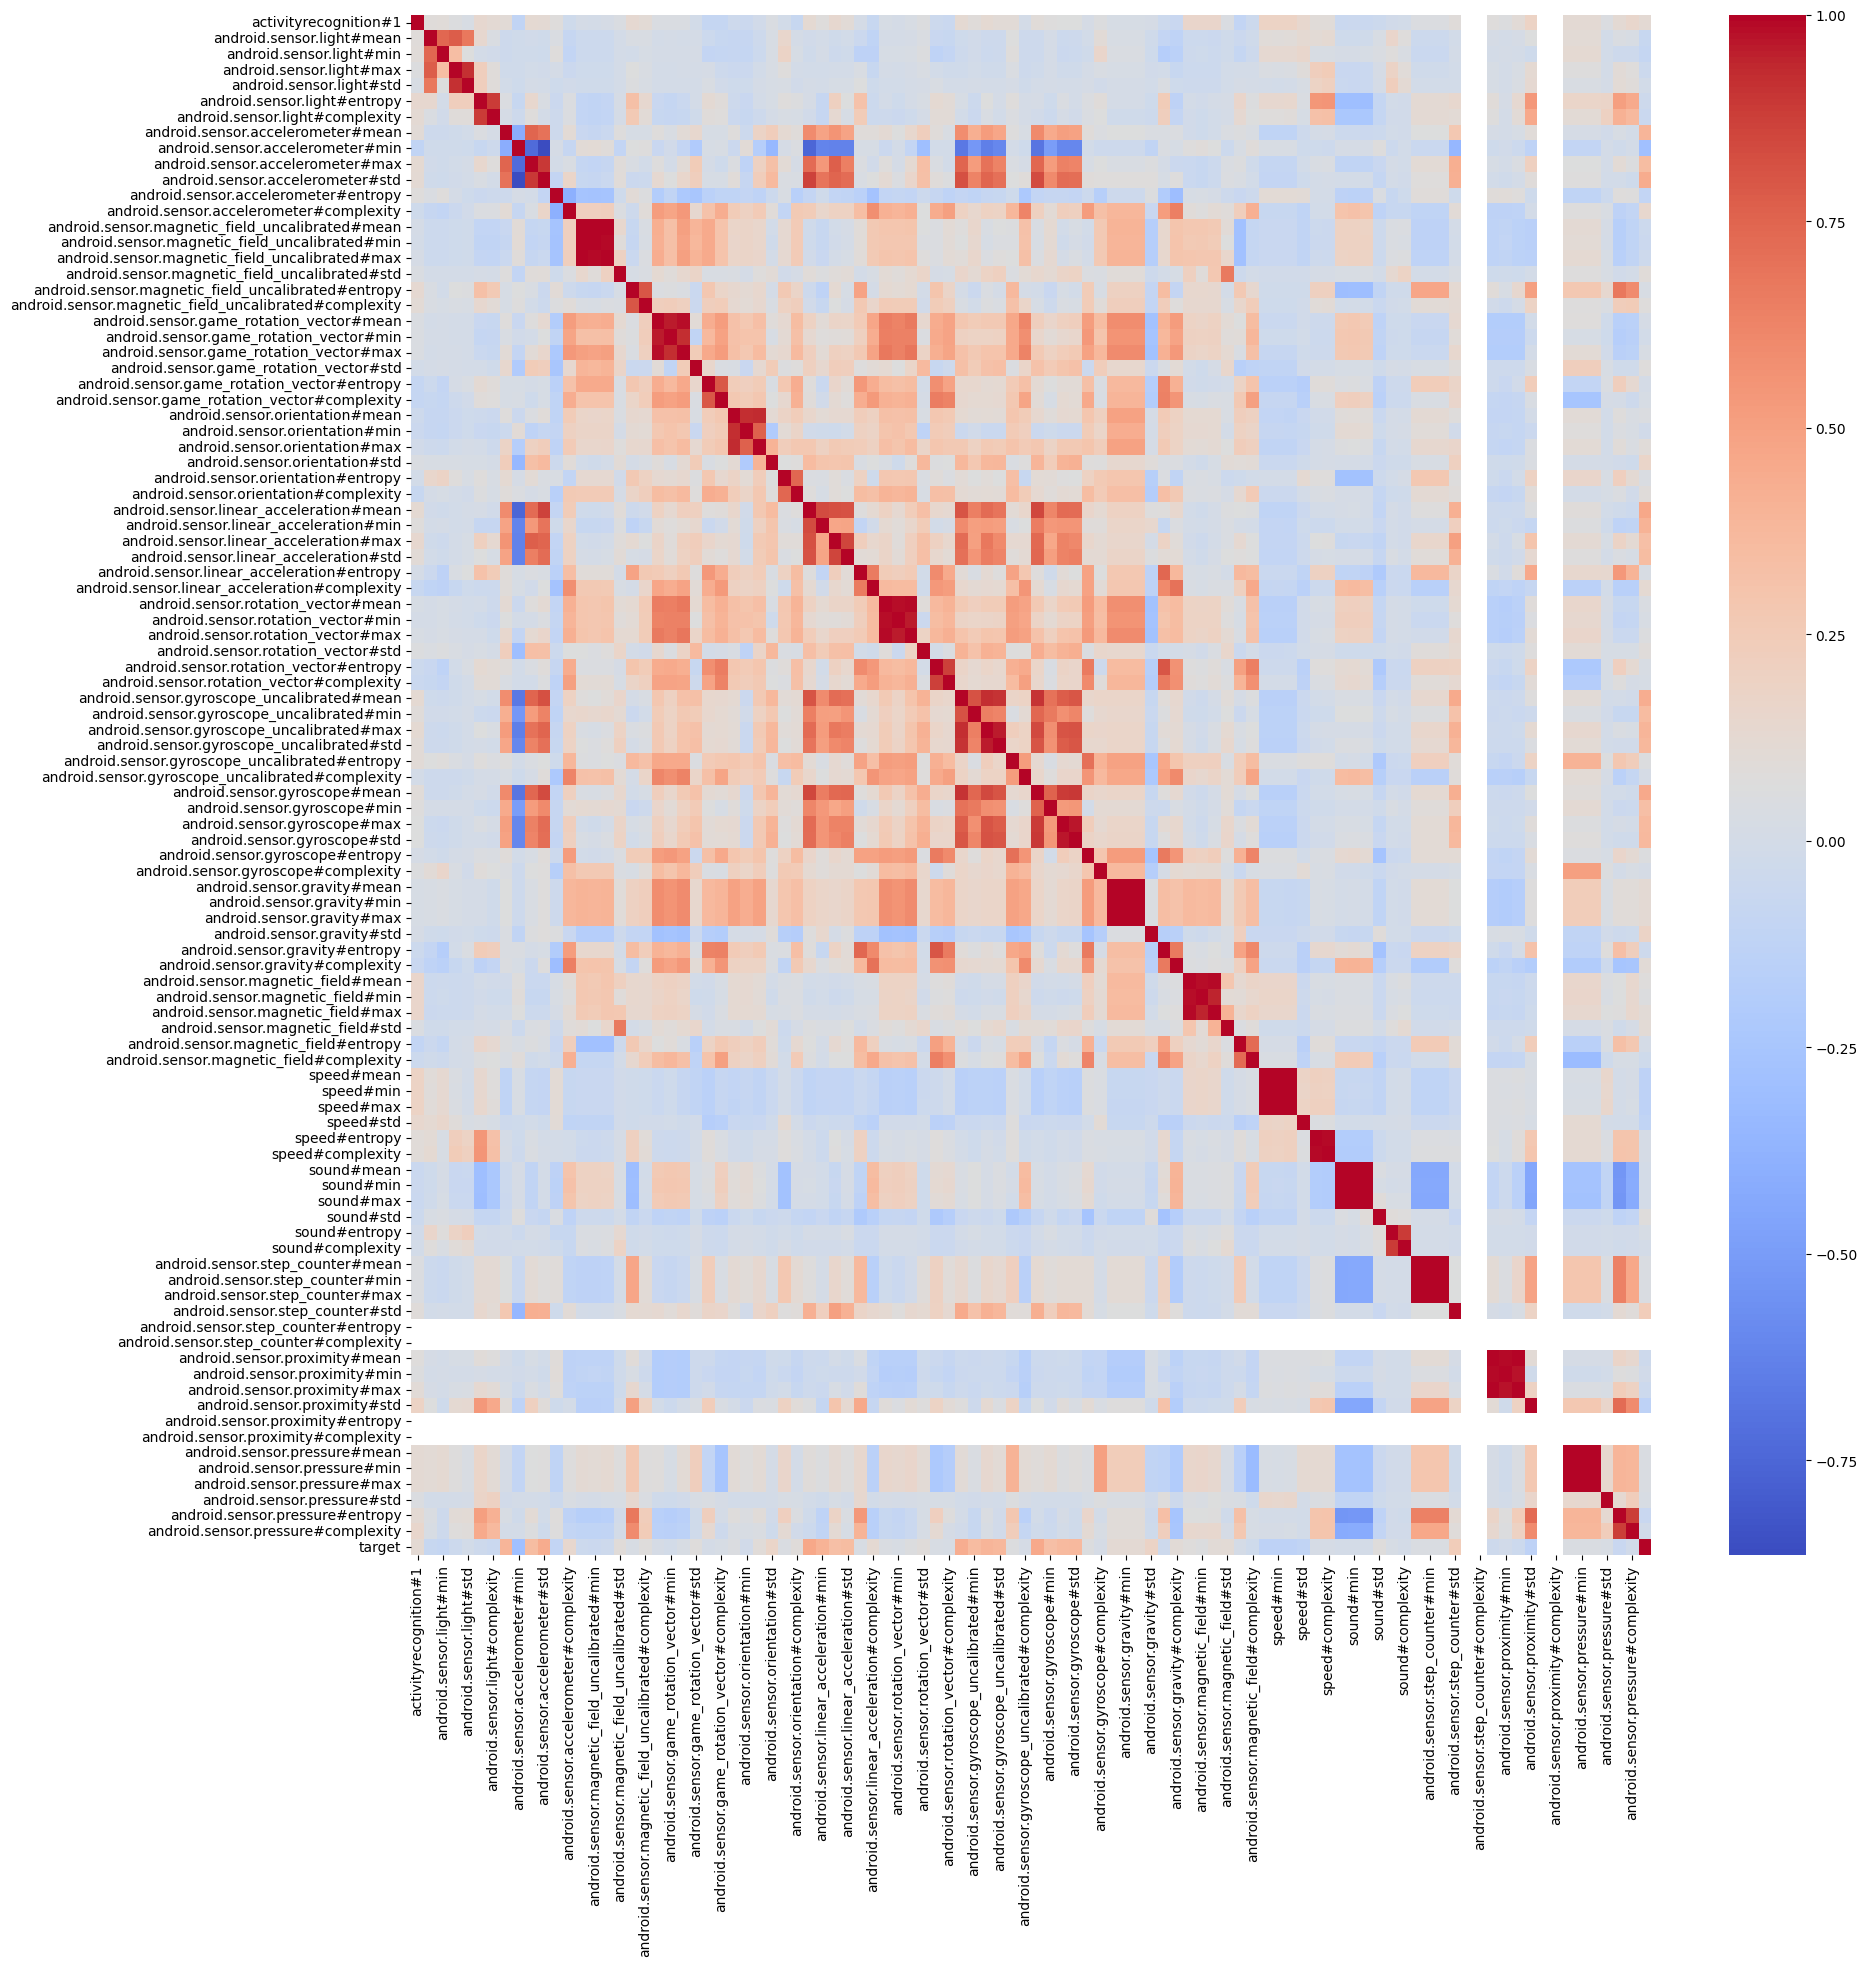

In [132]:
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [133]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [134]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

51

In [135]:
corr_features

{'android.sensor.accelerometer#max',
 'android.sensor.accelerometer#std',
 'android.sensor.game_rotation_vector#complexity',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.gravity#entropy',
 'android.sensor.gravity#max',
 'android.sensor.gravity#min',
 'android.sensor.gyroscope#entropy',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#mean',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#complexity',
 'android.sensor.light#max',
 'android.sensor.light#min',
 'android.sensor.light#std',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#std',
 'android.sensor.magnetic_field#complex

In [136]:
df1 = df.drop(corr_features,axis=1)

In [137]:
df1

,activityrecognition#1,android.sensor.light#mean,android.sensor.light#entropy,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#entropy,android.sensor.accelerometer#complexity,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.magnetic_field_uncalibrated#entropy,...,android.sensor.step_counter#std,android.sensor.step_counter#entropy,android.sensor.step_counter#complexity,android.sensor.proximity#mean,android.sensor.proximity#std,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#std,target
0,0.0,7.0,0.0,9.673811,9.461881,0.811699,0.094671,134.388497,2.402502,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,7.0,0.0,9.641004,5.644632,0.883534,0.059958,136.554708,4.736036,0.436209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,7.0,0.0,9.683349,9.587583,0.798529,0.097407,146.481960,0.777425,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,7.0,0.0,9.683914,9.576666,0.818604,0.089819,145.652413,0.493911,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,7.0,0.0,9.651339,8.123766,0.748452,0.111209,148.306727,0.493911,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0.0,58.0,0.0,10.946838,6.987842,0.905799,0.047963,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3246,0.0,58.0,0.0,10.249859,6.634168,0.904561,0.051819,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3247,0.0,58.0,0.0,10.771360,6.720124,0.895280,0.055372,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3248,0.0,2.0,0.0,13.163486,6.571714,0.753512,0.110496,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4


<Axes: >

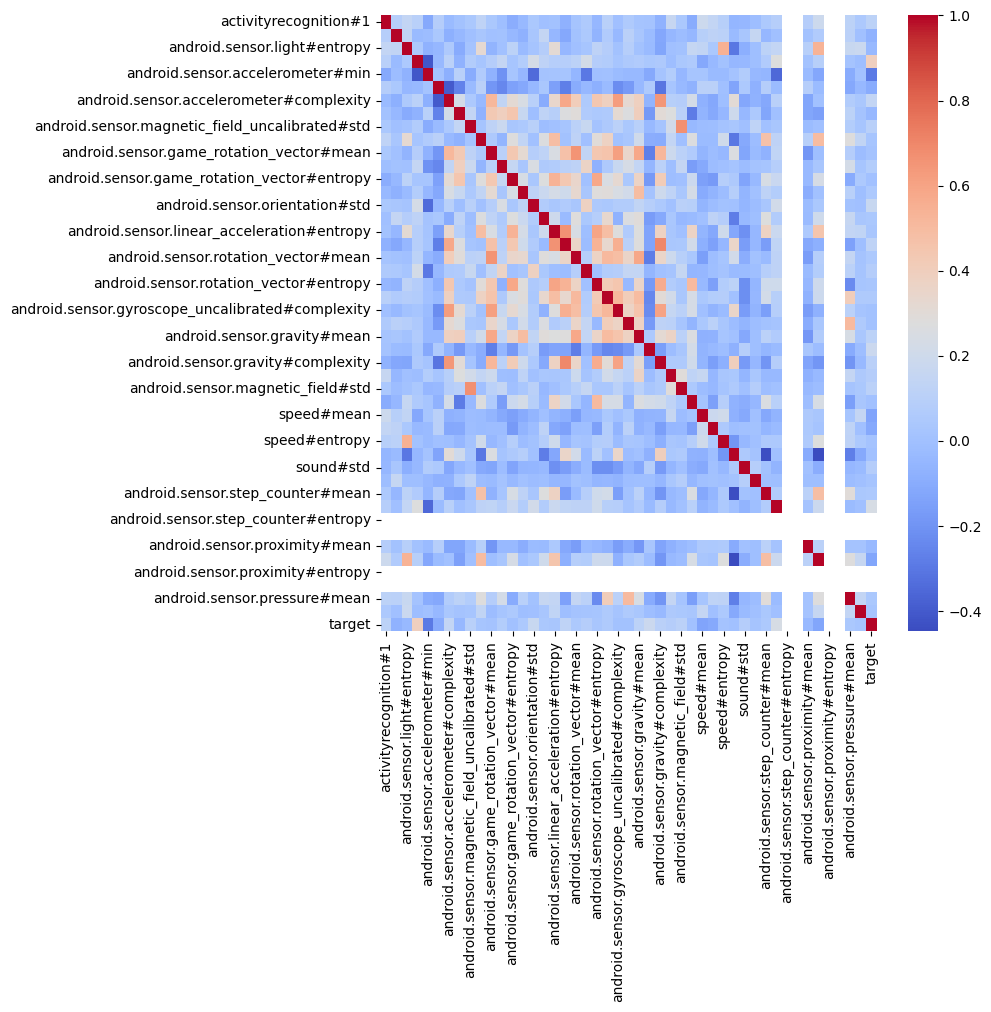

In [138]:
corr = df1.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [139]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')

#enc_df = pd.DataFrame(enc.fit_transform(df1[['target']]).toarray())

#final_df = df1.join(enc_df)

In [140]:
final_df = df1

In [141]:
final_df
# Numero de colunas 
inputNumber = len(final_df.columns) - 1

In [142]:
X = final_df.iloc[:,0:inputNumber]
y = final_df.iloc[:,inputNumber]

In [143]:
X

,activityrecognition#1,android.sensor.light#mean,android.sensor.light#entropy,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#entropy,android.sensor.accelerometer#complexity,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.magnetic_field_uncalibrated#entropy,...,android.sensor.step_counter#mean,android.sensor.step_counter#std,android.sensor.step_counter#entropy,android.sensor.step_counter#complexity,android.sensor.proximity#mean,android.sensor.proximity#std,android.sensor.proximity#entropy,android.sensor.proximity#complexity,android.sensor.pressure#mean,android.sensor.pressure#std
0,0.0,7.0,0.0,9.673811,9.461881,0.811699,0.094671,134.388497,2.402502,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,7.0,0.0,9.641004,5.644632,0.883534,0.059958,136.554708,4.736036,0.436209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,7.0,0.0,9.683349,9.587583,0.798529,0.097407,146.481960,0.777425,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,7.0,0.0,9.683914,9.576666,0.818604,0.089819,145.652413,0.493911,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,7.0,0.0,9.651339,8.123766,0.748452,0.111209,148.306727,0.493911,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0.0,58.0,0.0,10.946838,6.987842,0.905799,0.047963,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3246,0.0,58.0,0.0,10.249859,6.634168,0.904561,0.051819,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3247,0.0,58.0,0.0,10.771360,6.720124,0.895280,0.055372,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3248,0.0,2.0,0.0,13.163486,6.571714,0.753512,0.110496,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [144]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3245    4
3246    4
3247    4
3248    4
3249    4
Name: target, Length: 3250, dtype: int64

In [145]:
type(y)

pandas.core.series.Series

In [146]:
from sklearn.preprocessing import MinMaxScaler   #min max scaling

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X_scaled = scaler.transform(X)


In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_scaled,y,test_size=0.2)

In [148]:
type(X_train)


numpy.ndarray

In [149]:
type(y_train)

pandas.core.series.Series

In [150]:
y_train.shape

(2600,)

In [151]:
from re import L

def create_clients(feature_list, label_list, num_clients=5, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as
                data shards - tuple of features and label lists.
        args:
            feature_list: a list of numpy arrays of training features
            label_list:a list of binarized labels for each feature
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1

    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    print(len(feature_list))
    print(len(label_list))
    data = list(zip(feature_list, label_list))
    print(len(data))
    random.shuffle(data)
    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))}

In [152]:
X_train.shape

(2600, 46)

In [153]:

#create clients
clients = create_clients(X_train, y_train, num_clients=5, initial='client')

2600
2600
2600


In [154]:
len(clients['client_3'])

520

In [155]:
def batch_data(data_shard, bs=32):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

In [156]:
import tensorflow as tf

In [157]:

#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)

#process and batch the test set
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

In [158]:
class SimpleMLP:
    @staticmethod
    def build(shape, classes):
        model = Sequential()
        model.add(Dense(256, input_shape=(inputNumber,)))
        model.add(Activation("relu"))
        model.add(Dropout(0.40))
        model.add(Dense(256))
        model.add(Activation("relu"))
        model.add(Dropout(0.40))
        model.add(Dense(5))
        model.add(Activation("softmax"))
        return model

In [159]:
from tensorflow.keras.optimizers.legacy import SGD

lr = 0.01 
comms_round = 200
loss='sparse_categorical_crossentropy'
metrics = ['sparse_categorical_accuracy']
optimizer = SGD(learning_rate=lr,
                decay=lr / comms_round,
                momentum=0.9)

In [160]:
from sklearn.metrics import confusion_matrix
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad


def test_model(X_test, Y_test,  model1, model2, model3, comm_round):
    y_pred = []
    cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits1 = model1.predict(X_test)
    logits2 = model2.predict(X_test)
    logits3 = model3.predict(X_test)
    #print(Y_test)
    c1 = tf.argmax(logits1, axis=1).numpy()
    #c2 = tf.argmax(logits2, axis=1)
    #c3 = tf.argmax(logits3, axis=1)
    #c1 = logits1
    c2 = logits2
    c3 = logits3
    print(c1)
    print(c2)
    print(c3)
    for i in range(len(c1)):
        tmp = []
        tmp.append(c1[i])
        tmp.append(c2[i])
        tmp.append(c3[i])
        #print(tmp)
        y_pred.append(np.bincount(tmp).argmax())
    Y_test = np.squeeze(Y_test)

    y_pred = np.array(y_pred)



    acc = accuracy_score(y_pred, Y_test)
    print(y_pred.shape)
    print(Y_test.shape)
    #loss = cce(y_pred, Y_test)

    print('comm_round: {} | global_acc: {:.3%}'.format(comm_round, acc))
    cf=classification_report(Y_test,y_pred)
    print(cf)

    sentiment_classes = ['Bus', 'Car', 'Still', 'Train', 'Walking']

    cm = confusion_matrix(np.array(Y_test), y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)


    return acc, loss

In [161]:
import joblib
import sklearn.pipeline

In [ ]:
#initialize global model
smlp_global = SimpleMLP()
global_model1 = smlp_global.build(inputNumber, 5)
global_model2 = XGBClassifier()
global_model3 = RandomForestClassifier()

local_model2 = XGBClassifier()
local_model3 = RandomForestClassifier()


#commence global training loop
for comm_round in range(comms_round):

    # get the global model's weights - will serve as the initial weights for all local models
    global_weights1 = global_model1.get_weights()
    #global_weights2 = global_model2.get_weights()
    #global_weights3 = global_model3.get_weights()   # what happens to the rest of the weights? #
    #collect weights for XGB
    #collect weights for RF

    #initial list to collect local model weights after scalling
    scaled_local_weight_list1 = list()
    #scaled_local_weight_list2 = list()
    #scaled_local_weight_list3 = list()
    #list for XGB
    #list for RF

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)

    #loop through each client and create new local model
    for client in client_names:
        #print(4)
        smlp_local = SimpleMLP()
        local_model1 = smlp_local.build(inputNumber, 5)
        local_model1.compile(loss=loss,
                      optimizer=optimizer,
                      metrics=metrics)


        #set local model weight to the weight of the global model
        local_model1.set_weights(global_weights1)
        #local_model2.set_weights(global_weights2)
        #local_model3.set_weights(global_weights3)   # what happens to the rest of the weights? #
        #set weights for the other two
        #print(clients_batched[client])
        Samples = []
        labels = []

        for x,y in clients_batched[client]:
            temp = x.numpy().tolist()
            temp2 = y.numpy().tolist()
            for i in temp:
                Samples.append(i)
            for i in temp2:
                labels.append(i)

        arr = np.array(Samples)
        labelpd = pd.Series(labels)

        #local_model1.fit(clients_batched[client], epochs=1, verbose=1)
        local_model1.fit(arr, labelpd, epochs=1, verbose=1)
        local_model2.fit(arr, labelpd)
        local_model3.fit(arr, labelpd)

        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights1 = scale_model_weights(local_model1.get_weights(), scaling_factor)  # what happens here? #
        #scaled_weights2 = scale_model_weights(local_model2.get_weights(), scaling_factor)
        #scaled_weights3 = scale_model_weights(local_model3.get_weights(), scaling_factor)
        scaled_local_weight_list1.append(scaled_weights1)
        #scaled_local_weight_list2.append(scaled_weights2)
        #scaled_local_weight_list3.append(scaled_weights3)

        #clear session to free memory after each communication round
        K.clear_session()
    global_model2 = local_model2
    global_model3 = local_model3

    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights1 = sum_scaled_weights(scaled_local_weight_list1)
    #average_weights2 = sum_scaled_weights(scaled_local_weight_list2)
    #average_weights3 = sum_scaled_weights(scaled_local_weight_list3)
    #print(average_weights)
    #update global model
    global_model1.set_weights(average_weights1)
    #global_model2.set_weights(average_weights2)
    #global_model3.set_weights(average_weights3)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        #joblib.dump(pipeline, "xgb1.joblib.dat")
        #loaded_model = joblib.load("xgb1.joblib.dat")
        global_acc, global_loss = test_model(X_test, Y_test, global_model1, global_model2, global_model3, comm_round)  # which global model to pass here? #